<a href="https://colab.research.google.com/github/Sinrez/pyCoursera/blob/master/OOP_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1.1

1. Написать класс BoomBam, у которого есть метод Boom. При его вызове, как ни странно, печатается слово BOOM
2. Доработать этот класс так, чтобы вызов метода чередовал слова BOOM и BAM.

Плюс пример использования всего функционала класса с комментариями


In [ ]:
class BoomBam:

  def boom(self):
    print('BOOM')
  def bam(self):
    print('BAM')
  
bbam = BoomBam()
bbam.boom()

BOOM


In [ ]:
class BoomBam:

  def __init__(self):
    self.sound = 'BOOM'
  
  def boom(self):
      print(self.sound)
      if self.sound == 'BOOM':
        self.sound = 'BAM'
      else:
        self.sound = 'BOOM'

bbam = BoomBam()
for _ in range(10):
  bbam.boom()


BOOM
BAM
BOOM
BAM
BOOM
BAM
BOOM
BAM
BOOM
BAM


# Задание 1.2


Создайте класс RoundCircle. Методы:
* add(x, y) -- добавление точки с координатами (x, y)
* remove(x, y) -- удаление точки с координатами (x, y)
* circle() -- печать координат центра и радиуса минимальной окружности, содержащей все эти точки
* plot() -- создание изображения (графика), на котором нарисованы все точки и окружность

Плюс пример использования всего функционала класса с комментариями

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from itertools import combinations

In [14]:
class RoundCircle:
    def __init__(self):
        self.dots = []
        self.all_circles = []

    def add(self, x, y):
        if (x,y) not in self.dots:
            self.dots.append((x,y))

    def random_dots(self, n = 10, range_x = (-10, 10), range_y = (-10, 10)):
        for _ in range(n):
            self.add(
                randint(range_x[0], range_x[1]),
                randint(range_y[0], range_y[1])
            )

    def remove(self, x, y):
        try:
            self.dots.remove((x,y))
        except ValueError:
            pass

    def run(self):
        try:
            type(self.true_circles)
        except AttributeError:
            self.get_lines()
            self.get_triangles()
            self.dots_in_circle()

# получаем все возможные отрезки между точками (dot1, dot2): = длинна отрезка
# плюс данные о окружностях с центром на этих отрезках [x-окружности],[у-окружности],[радиус окружности]
    def get_lines(self):
        self.all_lines = dict()
        for indx1, dot1 in enumerate(self.dots):
            for indx2, dot2 in enumerate(self.dots[indx1 + 1:]):
                xo = (dot1[0] + dot2[0])/2
                yo = (dot1[1] + dot2[1])/2
                d = np.sqrt(((dot2[0]-dot1[0])**2) + ((dot2[1]-dot1[1])**2))/2
                self.all_lines[(indx1, indx2+indx1+1)] = d
                self.all_circles.append((xo,yo,d))

# получаем все возможные треугольники и окружности в которые они вписаны [x-окружности],[у-окружности],[радиус окружности]
    def get_triangles(self):
        self.all_triangles = [i for i in combinations(range(0, len(self.dots)), 3)]
        for i in self.all_triangles:
            a, b, c = combinations(i, 2)
            a, b, c = self.all_lines[a], self.all_lines[b], self.all_lines[c]
            ax,ay,bx,by,cx,cy = self.dots[i[0]][0],self.dots[i[0]][1],\
                                self.dots[i[1]][0],self.dots[i[1]][1],\
                                self.dots[i[2]][0],self.dots[i[2]][1]
            p = (a+b+c)/2
            if ((ax-cx)*(by-cy)-(bx-cx)*(ay-cy))*0.5 == 0:
                continue
            r = ((a*b*c)/(4*np.sqrt(abs(p*(p-a)*(p-b)*(p-c)))))*2
            xo = ((ay*(bx**2+by**2-cx**2-cy**2)+by*(cx**2 +cy**2-ax**2-ay**2)+cy*(ax**2+ay**2-bx**2-by**2))/
                  (ax*(by-cy)+bx*(cy-ay)+cx*(ay-by)))*(-0.5)
            yo = ((ax*(bx**2+by**2-cx**2-cy**2)+bx*(cx**2 +cy**2-ax**2-ay**2)+cx*(ax**2+ay**2-bx**2-by**2))/
                  (ax*(by-cy)+bx*(cy-ay)+cx*(ay-by)))*0.5
            self.all_circles.append((xo,yo, r))

    def dots_in_circle(self):
        self.true_circles = []
        for circle in self.all_circles:
            for dot in self.dots:
                if round((dot[0] - circle[0])**2 + (dot[1] - circle[1])**2,9) > round(circle[2]**2, 9):
                    break
            else:
                self.true_circles.append((circle[0], circle[1], circle[2]))

    def circle(self):
        self.run()
        tmp = [i[2] for i in self.true_circles]
        self.circle = self.true_circles[tmp.index(min(tmp))]
        print(f'Координаты центра окружности: ({self.circle[0]}, {self.circle[1]}), радиус: {self.circle[2]}')

    def plot(self):
        x,y,r = self.circle
        circle = plt.Circle((x, y), r, color = 'blue')
        fig = plt.figure(figsize=(10,10))
        ax = plt.gca()
        ax.cla()
        ax.spines['left'].set_position(('data',0))
        ax.spines['bottom'].set_position(('data',0))
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.set_xlim((x-r*1.1, x+r*1.1))
        ax.set_ylim((y-r*1.1, y+r*1.1))
        ax.plot([i[0] for i in self.dots],([j[1] for j in self.dots]), 'o', color='green')
        ax.plot(x, y, 'o', color='red')
        plt.annotate(f'({round(x, 2)}, {round(y, 2)})', (x, y), xytext=(x + r*0.03, y - r* 0.04), c = 'red')
        ax.add_artist(circle)
        plt.show()

In [16]:
a = RoundCircle()

In [17]:
# добавим тестовые точки
a.add(3,7)
a.add(-1,4)

In [18]:
# посмотрим сущеструющие точки
print(a.dots)

[(3, 7), (-1, 4)]


In [19]:
a.add(3,7)
a.add(9,3)
print(a.dots)

[(3, 7), (-1, 4), (9, 3)]


In [20]:
# удалим одну точку
a.remove(3,7)
print(a.dots)

[(-1, 4), (9, 3)]


In [21]:
# включение случайных точек
a.random_dots( n = 20, range_x = (-20, 20), range_y = (-20, 20))
print(a.dots)

[(-1, 4), (9, 3), (2, -2), (-11, -7), (-12, 12), (7, -6), (-1, -5), (8, -18), (2, -1), (12, 8), (-16, -20), (-18, -8), (7, 13), (0, -18), (15, 4), (-16, 13), (-6, 12), (-6, -6), (10, -16), (17, 6), (10, 14)]


In [22]:
# мин окружность описывающая все точки
a.circle()

Координаты центра окружности: (-2.257575757575758, -3.5), радиус: 21.47333751559756


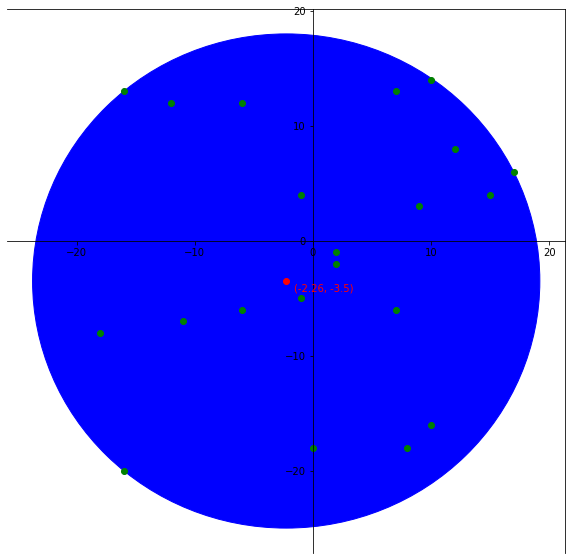

In [23]:
a.plot()

In [12]:
b = RoundCircle()
b.random_dots( n = 5, range_x = (2, 11), range_y = (0, 3))

In [24]:
b.get_lines()

In [25]:
# словарь all_lines в котором содержаться длинны отрезков
# (dot1, dot2): = длинна отрезка
b.all_lines

{(0, 1): 4.272001872658765,
 (0, 2): 2.5495097567963922,
 (0, 3): 1.5811388300841898,
 (0, 4): 1.0,
 (1, 2): 1.8027756377319946,
 (1, 3): 3.5,
 (1, 4): 4.031128874149275,
 (2, 3): 2.23606797749979,
 (2, 4): 2.5495097567963922,
 (3, 4): 0.7071067811865476}

In [26]:
# список all_circle в котором содержатся все возможные окружности
# [x-окружности],[у-окружности],[радиус окружности]
# после исполнения метода get_lines в этот атрибут добавляются все окружности построенные по двум точкам
b.all_circles

[(6.0, 1.5, 4.272001872658765),
 (7.5, 2.5, 2.5495097567963922),
 (9.5, 1.5, 1.5811388300841898),
 (10.0, 2.0, 1.0),
 (3.5, 1.0, 1.8027756377319946),
 (5.5, 0.0, 3.5),
 (6.0, 0.5, 4.031128874149275),
 (7.0, 1.0, 2.23606797749979),
 (7.5, 1.5, 2.5495097567963922),
 (9.5, 0.5, 0.7071067811865476),
 (6.0, 1.5, 4.272001872658765),
 (7.5, 2.5, 2.5495097567963922),
 (9.5, 1.5, 1.5811388300841898),
 (10.0, 2.0, 1.0),
 (3.5, 1.0, 1.8027756377319946),
 (5.5, 0.0, 3.5),
 (6.0, 0.5, 4.031128874149275),
 (7.0, 1.0, 2.23606797749979),
 (7.5, 1.5, 2.5495097567963922),
 (9.5, 0.5, 0.7071067811865476)]

In [27]:
# метод get_triangles(), получаем все возможные комбинации по три точки
# после чего находятся окружности описывающие эти треугольники
# (три точки лежащие на одной прямой отсеиваются)
b.get_triangles()

In [28]:
b.all_triangles

[(0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 4),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 4),
 (2, 3, 4)]

In [29]:
# следующий шаг метод dots_in_circle, который проверяет каждую окружность,
# на принодлежность к ней всех заданных точек
# результат заносится в список атрибута true_circles
b.dots_in_circle()
b.true_circles

[(6.0, 1.5, 4.272001872658765),
 (6.0, 1.5, 4.272001872658765),
 (9.642857142857142, -8.214285714285714, 11.219971261194999),
 (5.8125, 2.0, 4.305247524823626),
 (5.5, 4.5, 5.700877125495679)]

In [30]:
b.circle()

Координаты центра окружности: (6.0, 1.5), радиус: 4.272001872658765


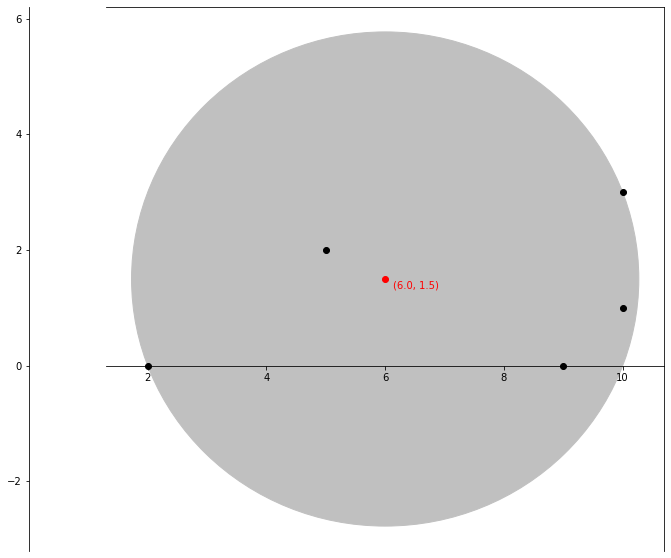

In [31]:
b.plot()

# Задание 2.1

Создать базовый класс - Геометрическая фигура, определить в нём поля и следующие методы: инициализация, печать, посчитать площадь и периметр. Создать 3 класса - наследника (квадрат, круг, конус), переопределить методы, при необходимости - добавить. 

Плюс пример использования всего функционала класса с комментариями


In [ ]:
from math import pi,sqrt

class Figure:
  #инициализация
  def __init__(self, name):
    self.name = name
  
  #печать
  def __str__(self):
        return f'Это фигура: {self.name}'

  #посчитать полощадь - нет универсальной формулы для всех фигур
  #также тут нет как в Java абстарактных методов, поэтому попробуем "эмулировать" их так
  #а непосредственные вычисления будут в наследниках ps асб методы есть - но что-то через "огороды" https://habr.com/ru/post/72757/

  def area(self):
    pass
  
  def per(self):
    pass
  
class Square(Figure):
    def __init__(self, length):
        super().__init__("Квадрат, например")
        self.length = length

    def area(self):
        return f'Площадь равна {self.length**2}'

    def per(self):
        return f'Периметр равен {4*self.length}'

class Circle(Figure):
    def __init__(self, radius):
        super().__init__("Кружок")
        self.radius = radius

    def area(self):
        return f'Площадь равна {pi*self.radius**2}'

    def per(self):
        return f'Периметр равен {2*pi*self.radius}'

class Conus(Figure):
    def __init__(self, length, radius):
        super().__init__("Это конус!")
        self.length = length
        self.radius = radius

    def area(self):
      #через через радиус и высоту
        return f'Площадь равна {"{0:.2f}".format(pi*self.radius*sqrt(self.radius**2 + self.length**2))}'
    
    #Как считать периметр? И применим ли он к конусу? можно считать периметр основания - окружности
    def per(self):
        return f'Периметр равен {"{0:.2f}".format(2*pi*self.radius)}'

def fabric(cl):
  #метод паттерна 'фабрика'
  print(cl.__str__())
  print(cl.area())
  print(cl.per())
  print('-' * 5)

if __name__ == '__main__':
  s = Square(3)
  fabric(s)

  c = Circle(7)
  fabric(c)

  co = Conus(9,4)
  fabric(co)


Это фигура: Квадрат, например
Площадь равна 9
Периметр равен 12
-----
Это фигура: Кружок
Площадь равна 153.93804002589985
Периметр равен 43.982297150257104
-----
Это фигура: Это конус!
Площадь равна 123.76
Периметр равен 25.13
-----


# Задание 2.2

Создать собственный класс - строку. Отнаследовать от него классы: палиндром (при инициалицации создаёт из строки палиндром, если она не является палидромом), транслит(переводит строку в транслитерационную запись). Длина всех строк не должна превышать 20 символов. Перегружать можно только метод `__init__`

Плюс пример использования всего функционала класса с комментариями

In [32]:
pip install transliterate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 1.9 MB/s 


In [ ]:
from transliterate import translit

class MyString:
  #Основной конструктор класса "Строка"
    def __init__(self, string):
        self.string = str(string)[0: 20]
    
    def __str__(self):
        return self.string

class Palindrome(MyString):
  def __init__(self, string):
    super().__init__(string)

  def __str__(self):
        return f'Вот палиндром: {self.string[::-1]}'

class Translit(MyString):
  def __init__(self, string):
    super().__init__(string)

  def __str__(self):
    return f'Вот транслит: {translit(self.string,"ru", reversed=True)}'
  # translit

if __name__ == '__main__':
  s1 = MyString('тестСтрока')
  print(s1)
  p1 = Palindrome(s1)
  print(p1)
  t1 = Translit(s1)
  print(t1)


тестСтрока
Вот палиндром: акортСтсет
Вот транслит: testStroka


# Задание 3.1

Создайте класс «Целочисленная матрица» для работы с матрицами произвольного размера. В классе должны быть реализованы следующие операции:

•	прибавление к одной матрице другой, вычитание матриц, умножение матрицы на матрицу и умножение матрицы на число.(реализовать с помощью перегрузки операций); 

•	заполнение матрицы случайными числами из заданного диапазона;

•	вывод матрицы на печать;

•	нахождение транспонированной матрицы

•	определение ортогональности матрицы

•	сравнение на равенство (операция ==).

In [33]:
import numpy as np

In [34]:
class Matrix:
    def __init__(self, size = None, mtx = None):
        self.size_mtx = size if mtx is None else mtx.shape
        self.mtx = mtx

    def __repr__(self):
        return f'{self.mtx}'

    def __add__(self, other):
        return Matrix(mtx= self.mtx + other.mtx)

    def __sub__(self, other):
        return Matrix(mtx= self.mtx - other.mtx)

    def __mul__(self, other):
        if isinstance(other,(int,float)):
            return Matrix(mtx=self.mtx * other)
        else:
            if self.size_mtx[0] == other.size_mtx[1] and self.size_mtx[1] == other.size_mtx[0]:
                return Matrix(mtx=self.mtx @ other.mtx)
            else:
                print(f'Некорректные размерности перемножаемых матриц {self.size_mtx}, {other.size_mtx})')

    def __eq__(self, other):
        if self.mtx.ravel().shape == other.mtx.ravel().shape:
            if np.all(self.mtx == other.mtx):
                return True
            else:
                return False
        else:
            return False

    def print(self):
        for i in self.mtx:
            for j in i:
                if isinstance(j, float):
                    print(f'{j:f}'.ljust(len(str(np.max(self.mtx)))+2), end='')
                else:
                    print(f'{j}'.ljust(len(str(np.max(self.mtx)))+1), end='')
            print()

    def orth(self):
        if self.size_mtx[0] == self.size_mtx[1]:
            if np.all(self.mtx @ self.mtx.T == np.eye(self.size_mtx[0], dtype='int')):
                return True
            else:
                return False
        else:
            print(f'Некорректная размерность! {self.size_mtx}')



    def rnd_int(self, start, end):
        self.mtx = np.random.randint(start, end, self.size_mtx, dtype=np.int)

    def trans(self):
        return Matrix(mtx= self.mtx.T)

In [35]:
x = Matrix((4,6))
y = Matrix((4,6))

x.rnd_int(2,8)
y.rnd_int(500,10000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [36]:
x == y

False

In [37]:
z = x + y

In [38]:
x

[[3 6 4 7 4 5]
 [5 6 7 3 7 6]
 [2 6 6 2 4 4]
 [3 3 6 4 5 2]]

In [39]:
y

[[1853 1032 3966 9140 2324 6517]
 [4160 3748 9458 8357 9252 2965]
 [7367 2874 6454 1933 8564 2690]
 [3428 8225 4689 8446 8509 4219]]

In [40]:
z

[[1856 1038 3970 9147 2328 6522]
 [4165 3754 9465 8360 9259 2971]
 [7369 2880 6460 1935 8568 2694]
 [3431 8228 4695 8450 8514 4221]]

In [41]:
z.print()

1856 1038 3970 9147 2328 6522 
4165 3754 9465 8360 9259 2971 
7369 2880 6460 1935 8568 2694 
3431 8228 4695 8450 8514 4221 


In [42]:
y == z - x

True

In [43]:
a = x * 64
a.print()

192 384 256 448 256 320 
320 384 448 192 448 384 
128 384 384 128 256 256 
192 192 384 256 320 128 


In [44]:
b = (y - a) * 0.1
b.print()

166.10000064.800000371.000000869.200000206.800000619.700000
384.000000336.400000901.000000816.500000880.400000258.100000
723.900000249.000000607.000000180.500000830.800000243.400000
323.600000803.300000430.500000819.000000818.900000409.100000


In [45]:
a.trans()

[[192 320 128 192]
 [384 384 384 192]
 [256 448 384 384]
 [448 192 128 256]
 [256 448 256 320]
 [320 384 256 128]]

In [46]:
c = b * a.trans()
c.print()

792396.800000741740.800000511449.600000554809.600000
1107328.0000001306003.200000920281.6000001008089.600000
761433.6000001099520.000000719462.400000763104.000000
1188268.8000001286092.800000934400.000000905753.600000


In [47]:
c.orth()

False

In [48]:
d = Matrix(mtx=np.array([[0,0,1],[1,0,0],[0,1,0]]))
d.print()

0 0 1 
1 0 0 
0 1 0 


In [49]:
d.orth()

True